# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: 
Runs, 

At Bats,

Hits, 

Doubles, 

Triples,

Homeruns,

Walks,

Strikeouts,

Stolen Bases,

Runs Allowed,

Earned Runs,

Earned Run Average (ERA),

Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

# Importing Libraries

In [11]:
#data processing
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


# Load the Dataset

In [4]:
df=pd.read_csv('baseball.csv')

In [5]:
#checking the first 5 rows
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
#checking size of the dataset
df.shape

(30, 17)

We have a dataset that contains 30 observations for 16 features from 2014 MLB seasons, with Number of Wins being the Target variable.

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can observe the dataset largely following a normal distribution with low skewness and minimal presence of outliers.

All features are numeric. Encoding will not be required for this dataset. However, we may need to scale the features further along the way.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


We have no null values in this dataset. All features are integer datatype and Earned Run Average is float.

In [9]:
#re-confirming 0 null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# EDA (Exploratory Data Analysis)

In [12]:
profile=ProfileReport(df,title='Profiling Report')
profile

High correlation is observed between Runs Allowed, Earned Runs, Earned Run Average.

Skewness is within the threshold of +-0.5 for all except CG, E, H, HR, R, SHO, SV.


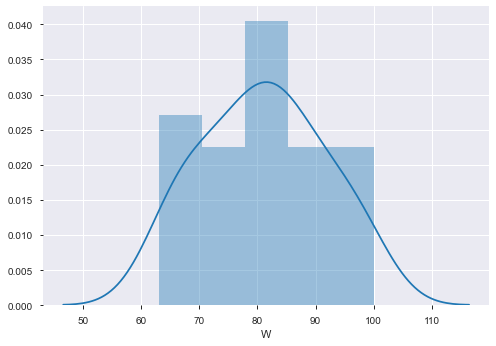

In [18]:
# Plotting distribution of wins
sns.distplot(df['W'])

We see our Target- Team Wins follows a normal distribution.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


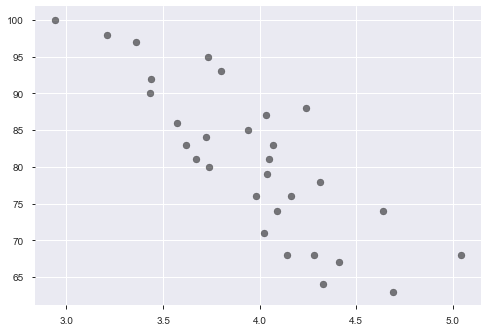

In [24]:
# Plotting scatter of ERA vs. Wins
plt.scatter(df['ERA'], df['W'], alpha=0.5,c=(0,0,0))

We see an inverse relation between ERA and Wins.

In [ ]:
# Plotting scatter of Year vs. Wins
plt.scatter(df['ERA'], df['W'], alpha=0.5,c=(0,0,0))

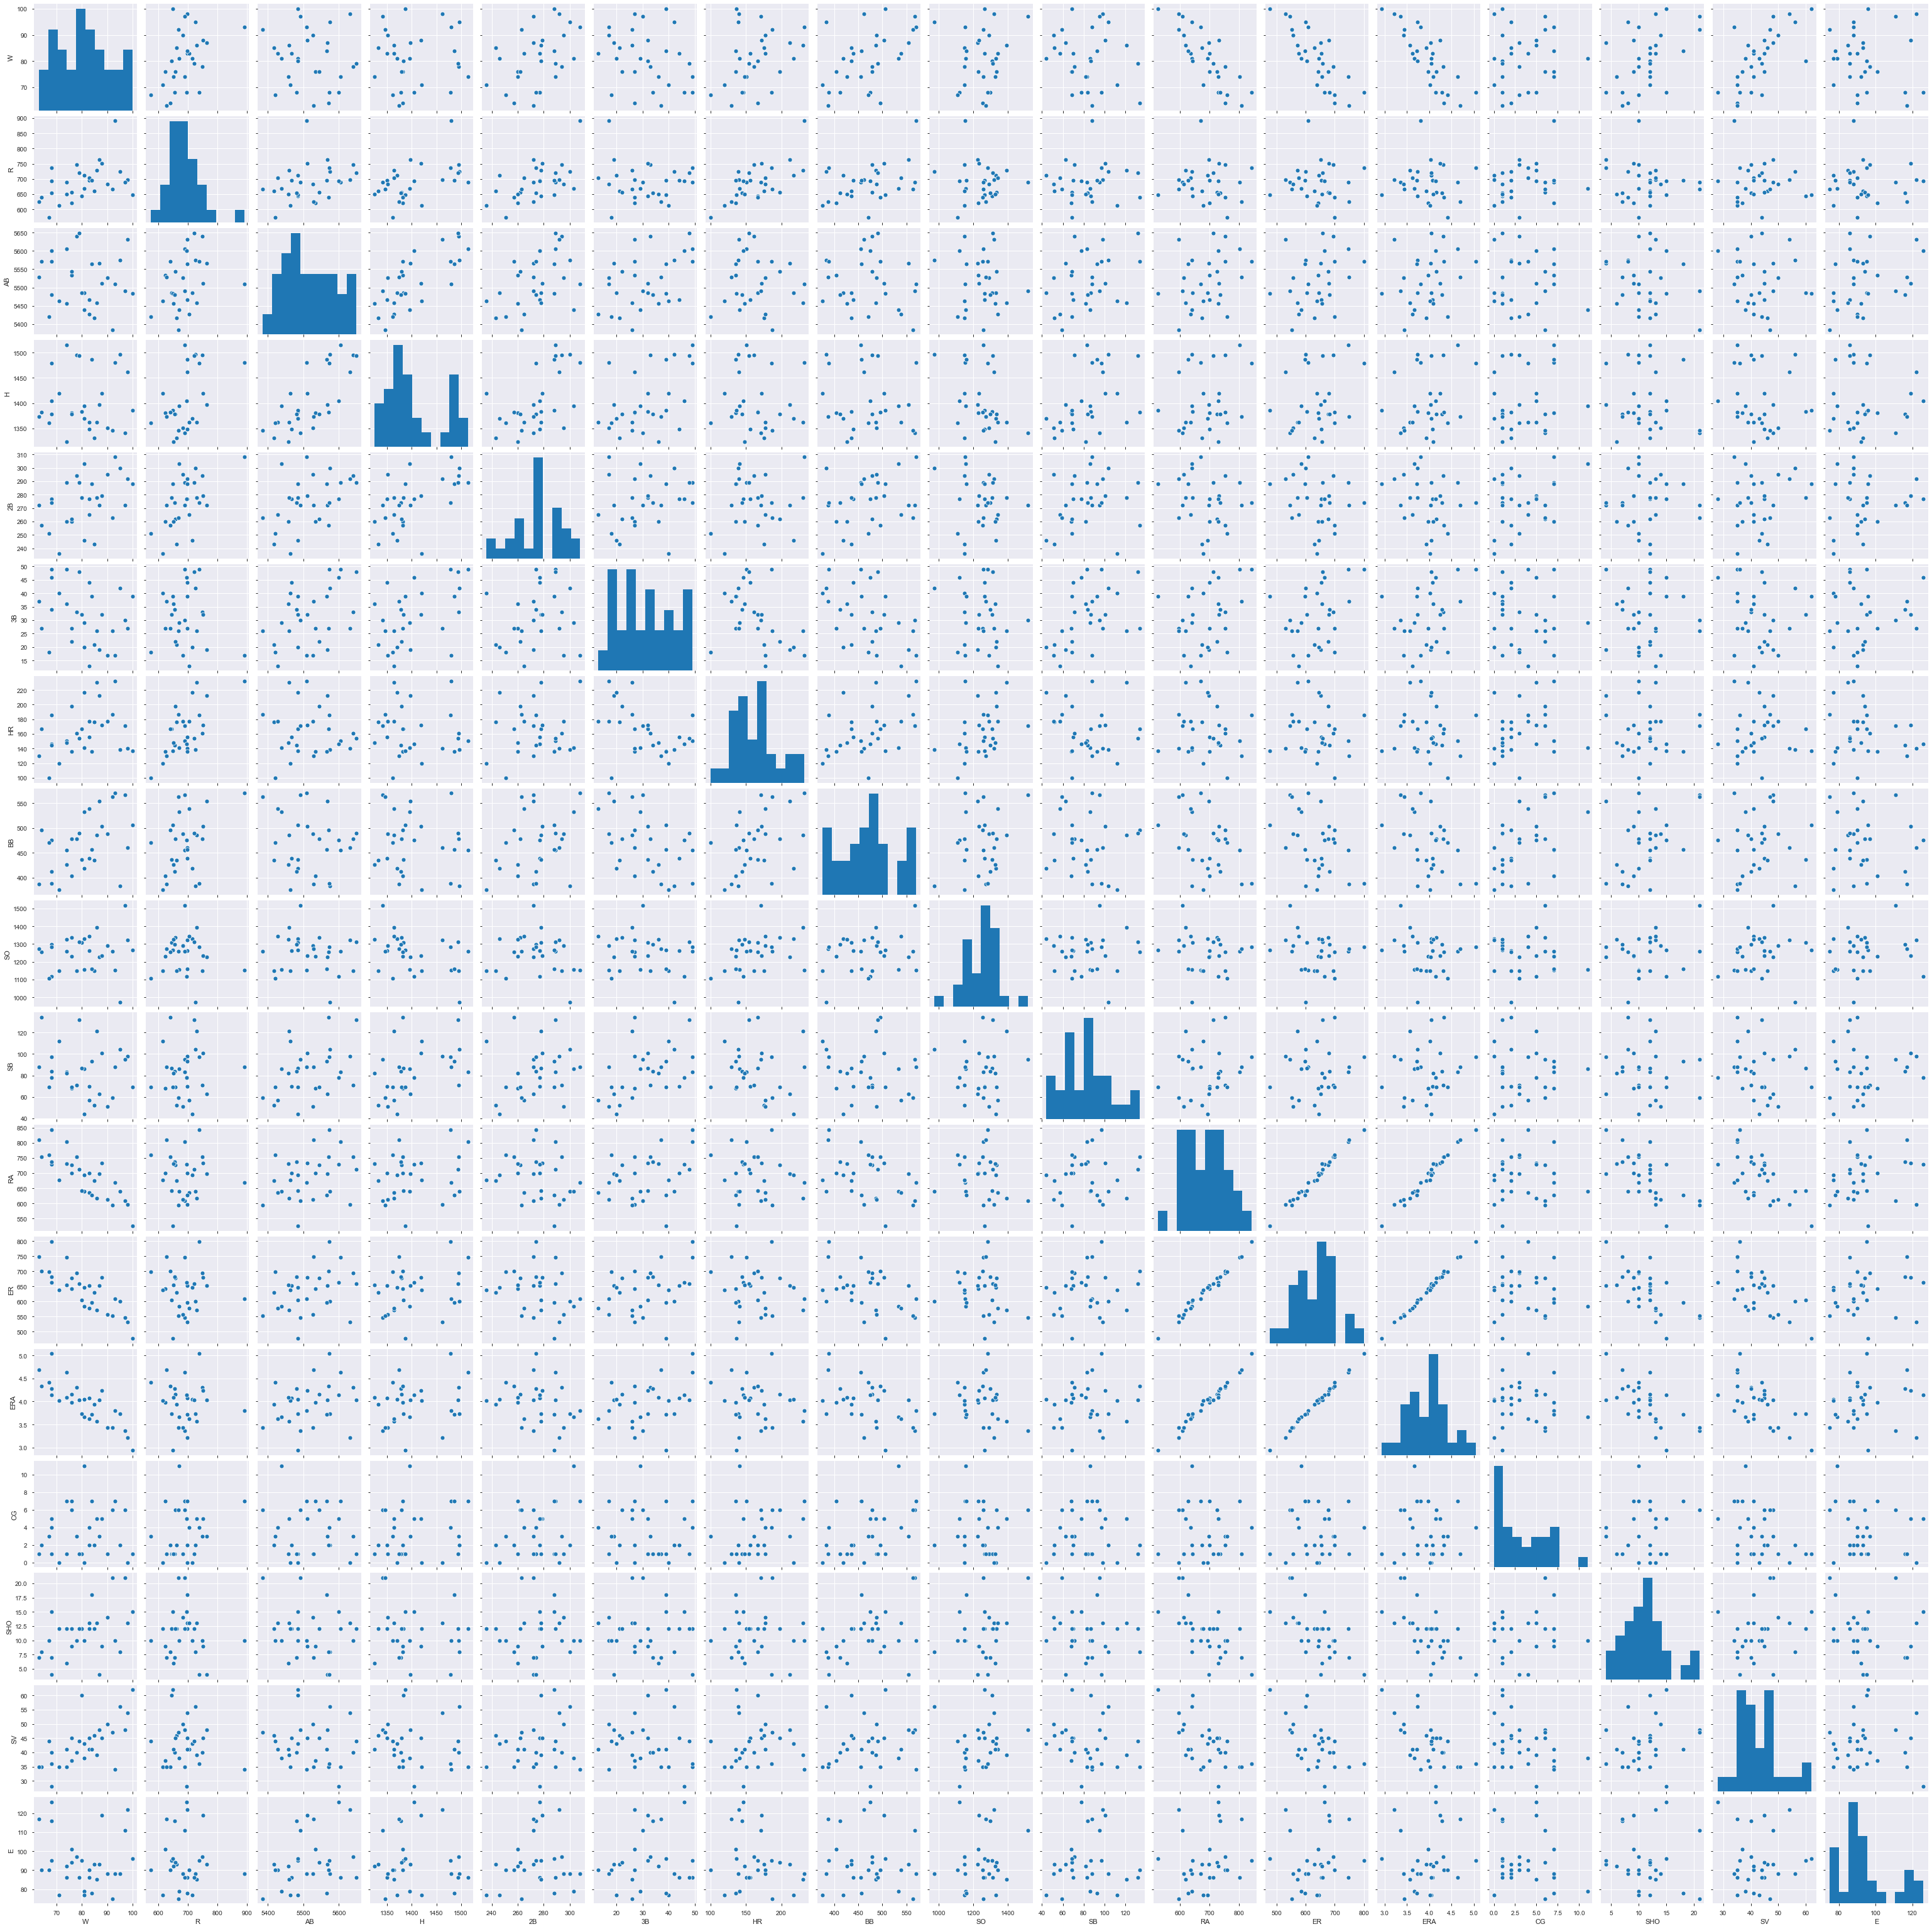

In [21]:
sns.pairplot(df)

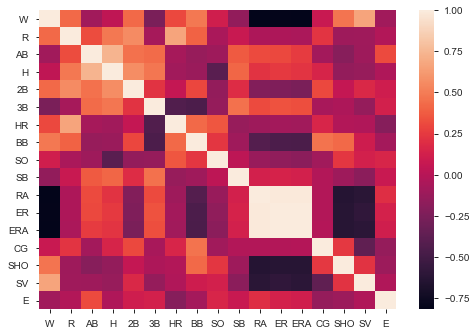

In [19]:
#Multi variate analysis
sns.heatmap(df.corr())

In [22]:
#checking correlation with each feature
df.corr()["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Saves, Walks by Batters, Shutouts, Runs, Doubles, Home Runs have a good positive influence over the Target Wins.

Earned Run Average, Runs Allowed, Earned Runs have a strong negative relation with Wins.

# Data Processing

In [25]:
x = df.drop('W', axis = 1)
y = df['W']

In [27]:
#Checking skewness
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [28]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [29]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew() #checking for skewness now

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [30]:
x=df_new

Let us check for outliers in the data.

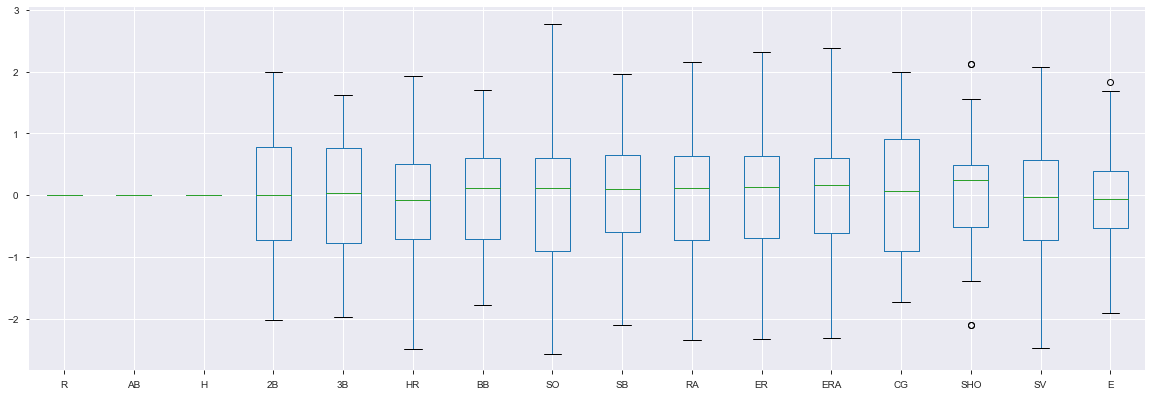

In [31]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Since there are only 3 outlier values close to whiskers in this data, we can proceed as is.

In [32]:
#Scaling
std = StandardScaler()
x = std.fit_transform(x)

# Best Random State

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test = LR.predict(x_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}")
    print("\n")

At random state 1, the training accuracy is: 0.9325936109076653
At random state 1, the testing accuracy is: 0.4855904968593864


At random state 2, the training accuracy is: 0.9376695554028088
At random state 2, the testing accuracy is: -0.5064563845484802


At random state 3, the training accuracy is: 0.9302688258501525
At random state 3, the testing accuracy is: 0.5952185843297455


At random state 4, the training accuracy is: 0.8543265461302426
At random state 4, the testing accuracy is: 0.776260826449823


At random state 5, the training accuracy is: 0.8961907194373079
At random state 5, the testing accuracy is: 0.6588869518987918


At random state 6, the training accuracy is: 0.886039641805924
At random state 6, the testing accuracy is: 0.5526093432080608


At random state 7, the training accuracy is: 0.8796094231137905
At random state 7, the testing accuracy is: 0.7904544459548866


At random state 8, the training accuracy is: 0.8847467715518758
At random state 8, the testing acc

At random state 72, the training accuracy is: 0.9131184889619839
At random state 72, the testing accuracy is: 0.38574323770803165


At random state 73, the training accuracy is: 0.8861621506363911
At random state 73, the testing accuracy is: 0.5798305496669017


At random state 74, the training accuracy is: 0.8863017660577601
At random state 74, the testing accuracy is: 0.618472555003059


At random state 75, the training accuracy is: 0.8770983307140068
At random state 75, the testing accuracy is: 0.5913395067439815


At random state 76, the training accuracy is: 0.9590422062018453
At random state 76, the testing accuracy is: 0.3755584495419071


At random state 77, the training accuracy is: 0.9293977906356606
At random state 77, the testing accuracy is: 0.5745784348692387


At random state 78, the training accuracy is: 0.9134688120574843
At random state 78, the testing accuracy is: 0.41951779033329817


At random state 79, the training accuracy is: 0.9431473775132442
At random state 7

We have the optimal random state at 27.
    

In [34]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=27)

In [36]:
model_grid = {"Linear": LinearRegression(),
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "ElasticNet": ElasticNet(),
              "KNN": KNeighborsRegressor(),
              "CART": DecisionTreeRegressor(),
              "RF": RandomForestRegressor(random_state=97),
              "GBM": GradientBoostingRegressor()}

scores_dict = {}
for name, model in model_grid.items():
    model.fit(x_train, y_train)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    scores_dict[name] = rmse

scores_dict = {k: v for k, v in sorted(scores_dict.items(), key=lambda item: item[1])}
scores_dict

{'Lasso': 3.6421552062682254,
 'ElasticNet': 3.844332306545301,
 'Ridge': 3.9553904393326986,
 'Linear': 4.0047086128478195,
 'KNN': 5.0084201813250075,
 'GBM': 5.5351195813180185,
 'RF': 5.756499215693541,
 'CART': 6.329066175305668}

In [37]:
from itertools import islice
top_4_scores = dict(islice(scores_dict.items(), 4))
print("Top 4 Scores")
top_4_scores

Top 4 Scores


{'Lasso': 3.6421552062682254,
 'ElasticNet': 3.844332306545301,
 'Ridge': 3.9553904393326986,
 'Linear': 4.0047086128478195}

In [38]:
# Random Forests Regression

rf_model = RandomForestRegressor(random_state=6106)

rf_params = {"max_depth": [5, 8, None],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 10]}


rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)

rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


In [39]:
# Lasso Regression

lasso_model = Lasso()

lasso_param = {"alpha": 10 ** (np.linspace(10, -2, 100) * 0.5)}

lasso_cv_model = GridSearchCV(lasso_model, lasso_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)

lasso_tuned = Lasso(**lasso_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [40]:
# ElasticNet Regression

enet_model = ElasticNet()

enet_params = {"l1_ratio": [0.1, 0.4, 0.5, 0.6, 0.8, 1],
               "alpha": [0.1, 0.01, 0.001, 0.2, 0.3, 0.5, 0.8, 0.9, 1]}

enet_cv_model = GridSearchCV(enet_model, enet_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)

enet_tuned = ElasticNet(**enet_cv_model.best_params_).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.9s finished


In [41]:
# Ridge Regression

ridge_model = Ridge()

ridge_param = {"alpha": 10 ** (np.linspace(10, -2, 100) * 0.5)}

ridge_cv_model = GridSearchCV(ridge_model, ridge_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)

ridge_tuned = ElasticNet(**ridge_cv_model.best_params_).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


In [42]:
from sklearn.metrics import mean_squared_error

tuned_grid = dict([("RF", rf_tuned), ("Lasso", lasso_tuned), ("ElasticNet", enet_tuned), ("Ridge", ridge_tuned)])

# get rmse values from tuned models
tuned_scores = {}
for name, model in tuned_grid.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    tuned_scores[name] = rmse

# sorting rmse
tuned_scores = {k: v for k, v in sorted(tuned_scores.items(), key=lambda item: item[1])}

best_model = dict(islice(tuned_scores.items(), 1))
best_model

{'ElasticNet': 3.3438148014308884}

In [ ]:
import joblib
joblib.dump(best_model,"baseball.pkl")